<a href="https://colab.research.google.com/github/GulamoRagu/gulamoragu/blob/main/Poles_Tension_Detectionn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***Start Install Dependencies***

In [1]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
!pip install opencv-python
!pip install torch

***Download DataSet***

In [5]:

# https://drive.google.com/file/d/1oSgIfcjeZZAhtM36rEJVfvEUaTcPWdAD/view?usp=sharing
!gdown 1oSgIfcjeZZAhtM36rEJVfvEUaTcPWdAD

Downloading...
From: https://drive.google.com/uc?id=1oSgIfcjeZZAhtM36rEJVfvEUaTcPWdAD
To: /content/MedianTension.v1i.yolov8.zip
100% 966k/966k [00:00<00:00, 104MB/s]


In [6]:
!unzip MedianTension.v1i.yolov8.zip

Archive:  MedianTension.v1i.yolov8.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/Median_tension_pole_7_jpg.rf.da1a39d76bc9c13c7a4c76890e0168df.jpg  
   creating: test/labels/
  inflating: test/labels/Median_tension_pole_7_jpg.rf.da1a39d76bc9c13c7a4c76890e0168df.txt  
   creating: train/
   creating: train/images/
 extracting: train/images/Median_tension_pole_10_jpg.rf.a3f100aba409bfddbad837dc81aa83a8.jpg  
 extracting: train/images/Median_tension_pole_14_jpg.rf.46bf3bbbc1711be8387b5b2c04fafb50.jpg  
 extracting: train/images/Median_tension_pole_15_jpg.rf.3ce1f9bbaebcaaeb6cf7ccdddaf6b140.jpg  
 extracting: train/images/Median_tension_pole_16_jpg.rf.5b510d71eb64834da66511f917bc9de1.jpg  
 extracting: train/images/Median_tension_pole_17_jpg.rf.d198cd010ecf351f3051bc6f50fde7c0.jpg  
 extracting: train/images/Median_tension_pole_18_jpg.rf.5bfc400d32c0

***Training Model***

In [7]:
!pip install ultralytics
from ultralytics import YOLO

# small https://github.com/ultralytics/assets/releases/download/v0.0.0/yolov8s.pt

_project = "runs/Median_Tension"
_name = "Baseline"
_data = "/content/data.yaml"

# Epoch
_epochs = 550
model = YOLO('yolov8s.pt')

results = model.train(
    data = _data,
    epochs = _epochs,
    batch = 16,
    project = _project,
    name = _name
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 882.2/882.2 kB 14.5 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 21.5M/21.5M [00:00<00:00, 143MB/s]


Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/data.yaml, epochs=550, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=runs/Median_Tension, name=Baseline, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, sho

100%|██████████| 755k/755k [00:00<00:00, 15.3MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       928  ultralytics.nn.modules.conv.Conv             [3, 32, 3, 2]                 
  1                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  2                  -1  1     29056  ultralytics.nn.modules.block.C2f             [64, 64, 1, True]             
  3                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  4                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  5                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128, 256, 3, 2]              
  6                  -1  2    788480  ultralytics.nn.modules.block.C2f             [256, 256, 2, True]           
  7                  -1  1   1180672  ultralytics

train: Scanning /content/train/labels... 17 images, 0 backgrounds, 0 corrupt: 100%|██████████| 17/17 [00:00<00:00, 470.69it/s]

train: New cache created: /content/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/valid/labels... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<00:00, 2696.87it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/Median_Tension/Baseline/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 63 weight(decay=0.0), 70 weight(decay=0.0005), 69 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/Median_Tension/Baseline
Starting training for 550 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/550         0G      3.151      4.369       2.99          1        640: 100%|██████████| 2/2 [00:56<00:00, 28.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.55s/it]

                   all          4          4    0.00333          1     0.0203    0.00726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/550         0G       1.25      3.435      1.646          1        640: 100%|██████████| 2/2 [00:45<00:00, 22.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all          4          4    0.00333          1     0.0672     0.0208



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/550         0G      1.848      3.355      1.622          3        640: 100%|██████████| 2/2 [00:46<00:00, 23.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.40s/it]

                   all          4          4    0.00333          1      0.513      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/550         0G       1.22      3.045       1.34          1        640: 100%|██████████| 2/2 [00:42<00:00, 21.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all          4          4    0.00333          1       0.62      0.396



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/550         0G      1.721       3.12       1.66          1        640: 100%|██████████| 2/2 [00:41<00:00, 20.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all          4          4    0.00333          1      0.614      0.433



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/550         0G      1.179      2.901      1.519          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all          4          4    0.00333          1      0.759      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/550         0G      2.138      2.815      1.991          2        640: 100%|██████████| 2/2 [00:40<00:00, 20.34s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all          4          4    0.00333          1      0.745      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/550         0G      1.592      2.492      1.382          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  3.00s/it]

                   all          4          4    0.00333          1      0.995      0.448



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/550         0G      1.573      2.306      2.111          1        640: 100%|██████████| 2/2 [00:42<00:00, 21.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.64s/it]

                   all          4          4    0.00333          1      0.845      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/550         0G      1.746      2.104      1.789          2        640: 100%|██████████| 2/2 [00:37<00:00, 18.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all          4          4    0.00333          1      0.697      0.266



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/550         0G      1.328      2.217       1.44          2        640: 100%|██████████| 2/2 [00:37<00:00, 18.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.86s/it]

                   all          4          4    0.00333          1      0.763      0.281



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/550         0G       1.46      2.284       1.53          2        640: 100%|██████████| 2/2 [00:39<00:00, 19.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.44s/it]

                   all          4          4    0.00333          1      0.845      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/550         0G      1.076      2.233      1.291          2        640: 100%|██████████| 2/2 [00:42<00:00, 21.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all          4          4    0.00333          1      0.725      0.229



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/550         0G      1.153      1.856      1.243          2        640: 100%|██████████| 2/2 [00:50<00:00, 25.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.93s/it]

                   all          4          4    0.00333          1      0.945      0.451



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/550         0G      1.537      2.094      1.687          2        640: 100%|██████████| 2/2 [00:44<00:00, 22.28s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]

                   all          4          4    0.00333          1      0.995       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/550         0G      1.928      2.877      1.869          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all          4          4    0.00333          1      0.945      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/550         0G      1.166      2.193      1.294          2        640: 100%|██████████| 2/2 [00:39<00:00, 19.76s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all          4          4    0.00333          1      0.912      0.513



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/550         0G        1.4      1.732      1.396          2        640: 100%|██████████| 2/2 [00:41<00:00, 20.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.91s/it]

                   all          4          4    0.00333          1      0.995      0.589



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/550         0G      1.315      1.819      1.311          3        640: 100%|██████████| 2/2 [00:41<00:00, 20.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all          4          4    0.00333          1      0.945      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/550         0G      1.176       1.84      1.237          2        640: 100%|██████████| 2/2 [00:40<00:00, 20.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all          4          4    0.00333          1      0.912      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/550         0G       1.27      1.589      1.389          4        640: 100%|██████████| 2/2 [00:41<00:00, 20.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]

                   all          4          4    0.00333          1      0.358      0.206



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/550         0G      1.514      1.905      1.538          3        640: 100%|██████████| 2/2 [00:40<00:00, 20.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all          4          4     0.0025       0.75       0.62      0.302



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/550         0G      1.125      1.698      1.273          4        640: 100%|██████████| 2/2 [00:40<00:00, 20.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all          4          4    0.00333          1      0.796      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/550         0G      1.439      1.806      1.263          5        640: 100%|██████████| 2/2 [00:41<00:00, 20.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.84s/it]

                   all          4          4    0.00333          1      0.794      0.346



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/550         0G      2.097      2.599      1.918          4        640: 100%|██████████| 2/2 [00:38<00:00, 19.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.24s/it]

                   all          4          4    0.00712          1      0.665       0.37



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/550         0G      1.754      2.076      1.549          6        640: 100%|██████████| 2/2 [00:38<00:00, 19.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.61s/it]

                   all          4          4      0.199          1      0.516      0.263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/550         0G      1.678      1.902      1.479          6        640: 100%|██████████| 2/2 [00:47<00:00, 23.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]

                   all          4          4     0.0645          1      0.452      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/550         0G      1.603      1.973      1.485          5        640: 100%|██████████| 2/2 [00:42<00:00, 21.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all          4          4     0.0645          1      0.452      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/550         0G      1.541      2.099      1.549          4        640: 100%|██████████| 2/2 [00:40<00:00, 20.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all          4          4    0.00333          1      0.183     0.0478



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/550         0G      1.294      1.609      1.311          4        640: 100%|██████████| 2/2 [00:39<00:00, 19.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]

                   all          4          4     0.0025       0.75     0.0471     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/550         0G      1.714      1.984      1.487          3        640: 100%|██████████| 2/2 [00:37<00:00, 18.98s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all          4          4     0.0025       0.75     0.0471     0.0163



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/550         0G      1.239      1.834       1.31          3        640: 100%|██████████| 2/2 [00:45<00:00, 22.77s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.81s/it]

                   all          4          4     0.0025       0.75     0.0476     0.0154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/550         0G      1.334      1.679       1.53          1        640: 100%|██████████| 2/2 [00:45<00:00, 22.88s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all          4          4    0.00732          1     0.0854     0.0223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/550         0G      1.571      3.225      1.885          1        640: 100%|██████████| 2/2 [00:42<00:00, 21.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.83s/it]

                   all          4          4    0.00732          1     0.0854     0.0223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/550         0G      2.026      2.438      1.682          1        640: 100%|██████████| 2/2 [00:41<00:00, 20.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all          4          4    0.00333          1     0.0545     0.0127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/550         0G      1.853      1.937      1.523          5        640: 100%|██████████| 2/2 [00:43<00:00, 21.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all          4          4      0.172        0.5      0.244     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/550         0G      2.117      2.579      1.991          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all          4          4      0.172        0.5      0.244     0.0342



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/550         0G      1.854      2.249      1.733          2        640: 100%|██████████| 2/2 [00:41<00:00, 20.72s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all          4          4      0.684       0.75      0.626      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/550         0G      1.593      1.865       1.55          2        640: 100%|██████████| 2/2 [00:40<00:00, 20.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.32s/it]

                   all          4          4       0.36       0.75      0.447      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/550         0G     0.7988       5.06     0.7708          0        640: 100%|██████████| 2/2 [00:43<00:00, 21.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.06s/it]

                   all          4          4       0.36       0.75      0.447      0.131



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/550         0G       1.93      2.078      2.125          1        640: 100%|██████████| 2/2 [00:42<00:00, 21.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.63s/it]

                   all          4          4     0.0705        0.5     0.0611     0.0174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/550         0G       1.42      1.753        1.4          4        640: 100%|██████████| 2/2 [00:40<00:00, 20.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]

                   all          4          4     0.0117        0.5     0.0162    0.00608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/550         0G      1.391      1.741      1.495          2        640: 100%|██████████| 2/2 [00:40<00:00, 20.41s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all          4          4     0.0117        0.5     0.0162    0.00608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/550         0G      1.371      1.677      1.329          2        640: 100%|██████████| 2/2 [00:40<00:00, 20.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all          4          4      0.146        0.5      0.161      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/550         0G       1.41       2.56      1.521          1        640: 100%|██████████| 2/2 [00:41<00:00, 20.73s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.77s/it]

                   all          4          4      0.146        0.5      0.161      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/550         0G      2.121      2.444      2.122          2        640: 100%|██████████| 2/2 [00:38<00:00, 19.38s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.92s/it]

                   all          4          4        0.2       0.25      0.147     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/550         0G      1.652      1.671      1.437          2        640: 100%|██████████| 2/2 [00:39<00:00, 19.80s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.57s/it]

                   all          4          4        0.2       0.25      0.147     0.0554



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/550         0G      1.718      2.021      1.727          2        640: 100%|██████████| 2/2 [00:40<00:00, 20.36s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.41s/it]

                   all          4          4      0.147       0.25      0.122      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/550         0G     0.6836      4.168      0.776          0        640: 100%|██████████| 2/2 [00:38<00:00, 19.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.43s/it]

                   all          4          4      0.147       0.25      0.122      0.063



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/550         0G      1.265      1.493      1.386          2        640: 100%|██████████| 2/2 [00:40<00:00, 20.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]

                   all          4          4      0.869       0.25      0.338      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/550         0G      1.263      1.467        1.3          2        640: 100%|██████████| 2/2 [00:43<00:00, 21.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all          4          4      0.869       0.25      0.338      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/550         0G      1.639      1.946       1.54          4        640: 100%|██████████| 2/2 [00:39<00:00, 19.74s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.54s/it]

                   all          4          4      0.428        0.5      0.436      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/550         0G      1.415      1.465      1.534          4        640: 100%|██████████| 2/2 [00:39<00:00, 19.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all          4          4      0.428        0.5      0.436      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/550         0G      1.697      2.259      1.674          2        640: 100%|██████████| 2/2 [00:40<00:00, 20.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all          4          4      0.307        0.5      0.275     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/550         0G      1.747      2.097      1.777          2        640: 100%|██████████| 2/2 [00:40<00:00, 20.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all          4          4      0.307        0.5      0.275     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/550         0G     0.7566      3.758     0.7119          0        640: 100%|██████████| 2/2 [00:40<00:00, 20.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]

                   all          4          4     0.0172        0.5     0.0569     0.0116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/550         0G      1.276      1.645      1.308          4        640: 100%|██████████| 2/2 [00:41<00:00, 20.65s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all          4          4     0.0172        0.5     0.0569     0.0116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/550         0G       1.58      1.553       1.38          4        640: 100%|██████████| 2/2 [00:39<00:00, 19.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]

                   all          4          4     0.0025       0.75     0.0152     0.0039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/550         0G      1.927       1.77      1.739          4        640: 100%|██████████| 2/2 [00:40<00:00, 20.07s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]

                   all          4          4     0.0025       0.75     0.0152     0.0039



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/550         0G      1.668      2.486      1.704          2        640: 100%|██████████| 2/2 [00:38<00:00, 19.43s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.96s/it]

                   all          4          4     0.0025       0.75     0.0688     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/550         0G      1.294      1.391      1.328          4        640: 100%|██████████| 2/2 [00:41<00:00, 20.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:05<00:00,  5.90s/it]

                   all          4          4     0.0025       0.75     0.0688     0.0312



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/550         0G      1.144      1.518      1.455          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all          4          4      0.422       0.25      0.197     0.0856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/550         0G     0.9616      1.355       1.29          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.42s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.79s/it]

                   all          4          4      0.422       0.25      0.197     0.0856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/550         0G      1.535      1.596      1.533          6        640: 100%|██████████| 2/2 [00:39<00:00, 19.53s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.80s/it]

                   all          4          4      0.203        0.5      0.499      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/550         0G      1.308      1.558      1.362          1        640: 100%|██████████| 2/2 [00:39<00:00, 19.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all          4          4      0.203        0.5      0.499      0.173



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/550         0G      1.418      1.369      1.494          2        640: 100%|██████████| 2/2 [00:38<00:00, 19.35s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]

                   all          4          4   0.000833       0.25    0.00939    0.00657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/550         0G      1.301      1.476      1.439          2        640: 100%|██████████| 2/2 [00:39<00:00, 19.84s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all          4          4   0.000833       0.25    0.00939    0.00657



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/550         0G      1.633      1.938      1.666          1        640: 100%|██████████| 2/2 [00:39<00:00, 19.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]

                   all          4          4      0.666      0.499      0.416     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/550         0G      1.033      1.477       1.33          1        640: 100%|██████████| 2/2 [00:42<00:00, 21.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all          4          4      0.666      0.499      0.416     0.0744



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/550         0G      1.455      1.418      1.347          2        640: 100%|██████████| 2/2 [00:40<00:00, 20.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.53s/it]

                   all          4          4      0.645        0.5      0.418     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/550         0G      1.448      1.368      1.346          6        640: 100%|██████████| 2/2 [00:41<00:00, 20.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.27s/it]

                   all          4          4      0.645        0.5      0.418     0.0848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/550         0G       1.55      1.908      1.518          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.74s/it]

                   all          4          4      0.457        0.5      0.291      0.085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/550         0G      1.766      1.685      1.502          5        640: 100%|██████████| 2/2 [00:38<00:00, 19.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.66s/it]

                   all          4          4      0.457        0.5      0.291      0.085



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/550         0G       1.41      1.839      1.791          1        640: 100%|██████████| 2/2 [00:41<00:00, 20.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all          4          4       0.36      0.987      0.429      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/550         0G      1.361      1.589      1.615          1        640: 100%|██████████| 2/2 [00:47<00:00, 23.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all          4          4       0.36      0.987      0.429      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/550         0G      1.466      1.506       1.53          3        640: 100%|██████████| 2/2 [00:42<00:00, 21.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.33s/it]

                   all          4          4      0.667          1      0.849      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/550         0G      1.381      1.199      1.217          2        640: 100%|██████████| 2/2 [00:39<00:00, 19.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.95s/it]

                   all          4          4      0.667          1      0.849      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/550         0G      1.466      1.821      1.446          2        640: 100%|██████████| 2/2 [00:40<00:00, 20.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.21s/it]

                   all          4          4       0.74      0.721      0.659      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/550         0G     0.8541      1.221      1.252          1        640: 100%|██████████| 2/2 [00:39<00:00, 19.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.17s/it]

                   all          4          4       0.74      0.721      0.659      0.231



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/550         0G      1.758      1.646      1.971          2        640: 100%|██████████| 2/2 [00:39<00:00, 19.71s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:04<00:00,  4.21s/it]

                   all          4          4      0.922       0.75      0.755      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/550         0G       1.31      1.046      1.217          6        640: 100%|██████████| 2/2 [00:40<00:00, 20.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all          4          4      0.922       0.75      0.755      0.251



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/550         0G      1.163      1.215      1.407          1        640: 100%|██████████| 2/2 [00:39<00:00, 19.86s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.56s/it]

                   all          4          4      0.919        0.5      0.507      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/550         0G      1.104     0.9657      1.202          2        640: 100%|██████████| 2/2 [00:39<00:00, 19.59s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all          4          4      0.919        0.5      0.507      0.181



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/550         0G      1.268      1.269      1.421          2        640: 100%|██████████| 2/2 [00:41<00:00, 20.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all          4          4      0.562          1      0.788      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/550         0G      1.201      1.212      1.295          2        640: 100%|██████████| 2/2 [00:41<00:00, 20.69s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all          4          4      0.562          1      0.788      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/550         0G      1.136     0.9512      1.174          4        640: 100%|██████████| 2/2 [00:41<00:00, 20.79s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.75s/it]

                   all          4          4       0.18       0.75      0.381      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/550         0G      1.185      1.471      1.341          2        640: 100%|██████████| 2/2 [00:38<00:00, 19.25s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.14s/it]

                   all          4          4       0.18       0.75      0.381      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/550         0G      1.437      1.735      1.343          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.14s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  4.00s/it]

                   all          4          4      0.328       0.25      0.326      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/550         0G        1.1      1.285      1.321          1        640: 100%|██████████| 2/2 [00:42<00:00, 21.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all          4          4      0.328       0.25      0.326      0.142



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/550         0G     0.9991       1.25      1.096          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all          4          4      0.732       0.25      0.359      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/550         0G      1.006      1.049      1.306          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.46s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all          4          4      0.732       0.25      0.359      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/550         0G     0.7002      3.837     0.7082          0        640: 100%|██████████| 2/2 [00:42<00:00, 21.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all          4          4       0.48       0.75      0.578      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/550         0G      1.639      1.691      1.711          1        640: 100%|██████████| 2/2 [00:41<00:00, 20.66s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.78s/it]

                   all          4          4       0.48       0.75      0.578      0.241



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/550         0G      1.393      1.276      1.641          1        640: 100%|██████████| 2/2 [00:47<00:00, 23.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.28s/it]

                   all          4          4      0.796          1      0.895      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/550         0G      1.069       1.08      1.266          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.56s/it]

                   all          4          4      0.796          1      0.895      0.416



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/550         0G      1.447       1.31      1.342          3        640: 100%|██████████| 2/2 [00:40<00:00, 20.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.65s/it]

                   all          4          4      0.492      0.487      0.335      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/550         0G     0.9895      1.084      1.319          1        640: 100%|██████████| 2/2 [00:39<00:00, 19.92s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all          4          4      0.492      0.487      0.335      0.106



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/550         0G      1.223      1.011      1.114          5        640: 100%|██████████| 2/2 [00:41<00:00, 20.70s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.59s/it]

                   all          4          4      0.333       0.75      0.369      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/550         0G      1.404       1.24      1.517          2        640: 100%|██████████| 2/2 [00:44<00:00, 22.27s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.66s/it]

                   all          4          4      0.333       0.75      0.369      0.111



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/550         0G      1.427      1.352      1.452          2        640: 100%|██████████| 2/2 [00:41<00:00, 20.94s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.64s/it]

                   all          4          4      0.305          1      0.332      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/550         0G      1.836      1.371       2.18          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.22s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.57s/it]

                   all          4          4      0.305          1      0.332      0.191



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/550         0G      1.309      1.116      1.325          5        640: 100%|██████████| 2/2 [00:41<00:00, 20.57s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.57s/it]

                   all          4          4      0.215        0.5      0.187       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/550         0G      1.206      1.022      1.149          4        640: 100%|██████████| 2/2 [00:39<00:00, 19.64s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]

                   all          4          4      0.215        0.5      0.187       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/550         0G      0.903     0.9922      1.122          3        640: 100%|██████████| 2/2 [00:41<00:00, 20.75s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]

                   all          4          4      0.526          1      0.697      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/550         0G      1.978      3.552      1.467          1        640: 100%|██████████| 2/2 [00:39<00:00, 19.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all          4          4      0.526          1      0.697      0.525



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/550         0G      1.032      1.139      1.158          5        640: 100%|██████████| 2/2 [00:39<00:00, 19.99s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.58s/it]

                   all          4          4      0.795      0.973      0.895      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/550         0G      1.362     0.9743      1.299          3        640: 100%|██████████| 2/2 [00:42<00:00, 21.26s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.61s/it]

                   all          4          4      0.795      0.973      0.895      0.571



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/550         0G      1.485      1.147      1.417          3        640: 100%|██████████| 2/2 [00:41<00:00, 20.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.87s/it]

                   all          4          4      0.949        0.5      0.717       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/550         0G      1.332      1.215       1.28          4        640: 100%|██████████| 2/2 [00:46<00:00, 23.20s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.60s/it]

                   all          4          4      0.949        0.5      0.717       0.44



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/550         0G      1.423      1.384       1.51          1        640: 100%|██████████| 2/2 [00:42<00:00, 21.30s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.55s/it]

                   all          4          4      0.941        0.5      0.788      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/550         0G       1.08     0.9115      1.118          1        640: 100%|██████████| 2/2 [00:40<00:00, 20.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.64s/it]

                   all          4          4      0.941        0.5      0.788      0.521



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/550         0G      1.583       1.32       1.45          2        640: 100%|██████████| 2/2 [00:42<00:00, 21.39s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.30s/it]

                   all          4          4      0.954        0.5      0.736      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/550         0G      1.395       1.32      1.302          5        640: 100%|██████████| 2/2 [00:40<00:00, 20.49s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.49s/it]

                   all          4          4      0.954        0.5      0.736      0.475



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/550         0G      1.227      1.128      1.256          6        640: 100%|██████████| 2/2 [00:42<00:00, 21.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.52s/it]

                   all          4          4      0.705       0.75      0.849      0.491



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/550         0G      1.415      1.337      1.518          2        640: 100%|██████████| 2/2 [00:42<00:00, 21.44s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:02<00:00,  2.62s/it]

                   all          4          4      0.705       0.75      0.849      0.491
EarlyStopping: Training stopped early as no improvement observed in last 100 epochs. Best results observed at epoch 15, best model saved as best.pt.
To update EarlyStopping(patience=100) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



115 epochs completed in 1.449 hours.
Optimizer stripped from runs/Median_Tension/Baseline/weights/last.pt, 20.0MB
Optimizer stripped from runs/Median_Tension/Baseline/weights/best.pt, 20.0MB

Validating runs/Median_Tension/Baseline/weights/best.pt...
Ultralytics 8.3.9 🚀 Python-3.10.12 torch-2.4.1+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 186 layers, 9,828,051 parameters, 0 gradients, 23.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:03<00:00,  3.47s/it]


                   all          4          4    0.00333          1      0.995       0.63
Speed: 2.7ms preprocess, 841.5ms inference, 0.0ms loss, 11.2ms postprocess per image
Results saved to runs/Median_Tension/Baseline


***Predicting***

In [8]:
model_pt = "/content/runs/Median_Tension/Baseline/weights/best.pt"
model = YOLO(model_pt)

results = model.predict(
    source="/content/valid/images",
    conf=0.5,
    save=True,
    show_boxes=False
)


image 1/4 /content/valid/images/Median_tension_pole_11_jpg.rf.fc86d36f1fae05d0fd3c3ddf2fab7601.jpg: 640x640 (no detections), 555.4ms
image 2/4 /content/valid/images/Median_tension_pole_12_jpg.rf.11cb4dd3bd4421eca2c3d780ef959cf4.jpg: 640x640 (no detections), 561.0ms
image 3/4 /content/valid/images/Median_tension_pole_13_jpg.rf.e90516e3e190635fbe71540cdcbec9b0.jpg: 640x640 (no detections), 588.2ms
image 4/4 /content/valid/images/Median_tension_pole_4_jpg.rf.f0fe6fa3d9c009adc5299d02c2de545f.jpg: 640x640 (no detections), 539.8ms
Speed: 3.6ms preprocess, 561.1ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


In [9]:
from glob import glob
from IPython.display import display, Image

files = glob("runs/detect/predict/*.jpg")
files
images = [Image(img) for img in files]

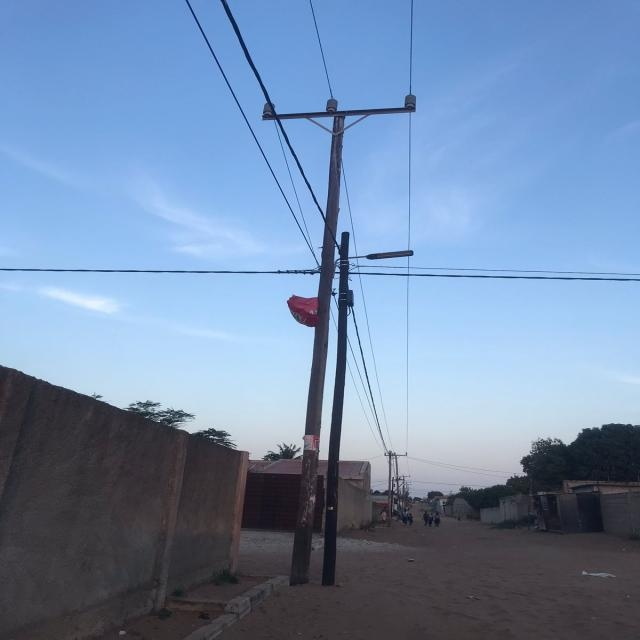

In [10]:
images[0]